# **Background**

An autoencoder is a neural network that takes an input, encodes it into a lower-dimensional latent space through "encoding" layers, and then attempts to reconstruct the original input using "decoding" layers. Autoencoders are often used for dimensionality reduction.

# **Task:**

Train a 64x16x64 autoencoder on the digits dataset.



In [45]:
# uploading nn.py

from google.colab import files
uploaded = files.upload()

Saving nn.py to nn.py


In [46]:
# imports

from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from nn import NeuralNetwork

# Loading digits datasets using `sklearn.datasets.load_digits()`

In [ ]:
digits = load_digits()

X = digits.data
y = digits.target

# Split data into training and validation

In [37]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
np.random.seed(888)

indices = np.arange(n_samples)
np.random.shuffle(indices)

train_size = int(0.8 * n_samples)
X_train, X_test = data[indices[:train_size]], data[indices[train_size:]]
y_train, y_test = digits.target[indices[:train_size]], digits.target[indices[train_size:]]

# Generate instance of `NeuralNetwork` class


In [55]:
nn_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},  # Input -> Hidden layer (64 -> 16)
    {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}  # Hidden -> Output layer (16 -> 64)
]

learning_rate = 1e-3
random_seed = 8
batch_size = 50
epochs = 1000
loss_function = 'mean_squared_error'

network = NeuralNetwork(nn_architecture, learning_rate, random_seed, batch_size, epochs, loss_function)

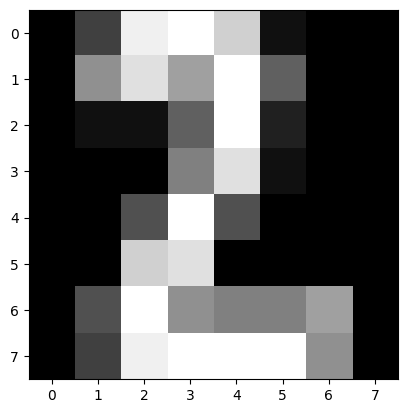

[[ 0.  4. 15. 16. 13.  1.  0.  0.]
 [ 0.  9. 14. 10. 16.  6.  0.  0.]
 [ 0.  1.  1.  6. 16.  2.  0.  0.]
 [ 0.  0.  0.  8. 14.  1.  0.  0.]
 [ 0.  0.  5. 16.  5.  0.  0.  0.]
 [ 0.  0. 13. 14.  0.  0.  0.  0.]
 [ 0.  5. 16.  9.  8.  8. 10.  0.]
 [ 0.  4. 15. 16. 16. 16.  9.  0.]]


In [ ]:
# Visualizing a digit
plt.imshow(X_train[0].reshape(8, 8), cmap="gray")
plt.show()
print(X_train[0].reshape(8, 8))

In [ ]:
# Shapes of inputs and labels
print("Shape of training inputs is:", X_train.shape)
print("Shape of training set labels is:", y_train.shape)

print("Shape of test inputs is:", X_test.shape)
print("Shape of test set labels is:", y_test.shape)

Shape of training inputs is: (1437, 64)
Shape of training set labels is: (1437,)
Shape of test inputs is: (360, 64)
Shape of test set labels is: (360,)


# Train your autoencoder on the training data

In [76]:
# Define the neural network architecture
nn_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},  # Input -> Hidden layer (64 -> 16)
    {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}  # Hidden -> Output layer (16 -> 64)
]

# Initialize an empty list to store the validation losses
validation_loss = []

# List of hyperparameters to test
lr_test = [1e-2, 1e-3, 1e-4]
batch_size_test = [200, 300, 400, 500]
hyperparameters = [(x, y) for x in lr_test for y in batch_size_test]
loss_function = 'mean_squared_error'
epochs = 400

# Loop through all hyperparameter combinations
for var in hyperparameters:
    print('lr, batch_size:', var)  # Corrected print statement to use var

    # Create the neural network with the current hyperparameters
    network = NeuralNetwork(
        nn_architecture,
        lr=var[0],
        seed=random_seed,
        batch_size=var[1],
        epochs=epochs,
        loss_function=loss_function
    )

    # Train the network
    per_epoch_loss_train, per_epoch_loss_val = network.fit(X_train.T, X_train.T, X_test.T, X_test.T)

    # Store the average of the last 10 epochs of validation loss
    validation_loss.append(np.mean(per_epoch_loss_val[-10:]))

# Print the results of validation losses for each combination of hyperparameters
print("Validation loss list:", validation_loss)

lr, batch_size: (0.01, 200)
Epoch 1  	Training Loss: 0.8343354864252978	Validation Loss: 914.3434050937504
Epoch 2  	Training Loss: 914.8765254955363	Validation Loss: 0.9401842090383703
Epoch 3  	Training Loss: 0.9370181172349683	Validation Loss: 0.938417920087931
Epoch 4  	Training Loss: 0.9352944862056255	Validation Loss: 0.936747075070756
Epoch 5  	Training Loss: 0.933665246573885	Validation Loss: 0.9351675675169631
Epoch 6  	Training Loss: 0.9321261771003404	Validation Loss: 0.9336743741716047
Epoch 7  	Training Loss: 0.9306722873049843	Validation Loss: 0.932262748898413
Epoch 8  	Training Loss: 0.9292988629063693	Validation Loss: 0.930928207367703
Epoch 9  	Training Loss: 0.9280014505353674	Validation Loss: 0.9296665125910237
Epoch 10  	Training Loss: 0.9267758432949464	Validation Loss: 0.9284736612557136
Epoch 11  	Training Loss: 0.9256180671191448	Validation Loss: 0.9273458708151057
Epoch 12  	Training Loss: 0.9245243678870094	Validation Loss: 0.9262795672925838
Epoch 13  	Train

# Final Autoencoder

In [77]:
final_autoencoder = NeuralNetwork(nn_architecture,
                                lr = 1e-3,
                                seed = 8,
                                batch_size = 400,
                                epochs = 500,
                                loss_function='mean_squared_error')

# Run final model
per_epoch_loss_train, per_epoch_loss_val=final_autoencoder.fit(X_train, y_train, X_test, y_test)

Epoch 1  	Training Loss: 0.01599011130627455	Validation Loss: 0.06089715252004367
Epoch 2  	Training Loss: 0.015748153697381844	Validation Loss: 0.05991095129431239
Epoch 3  	Training Loss: 0.01549736658186733	Validation Loss: 0.058887419921102316
Epoch 4  	Training Loss: 0.015237221392125378	Validation Loss: 0.05783082292895255
Epoch 5  	Training Loss: 0.014968807596973352	Validation Loss: 0.056750314397978625
Epoch 6  	Training Loss: 0.014692404554937128	Validation Loss: 0.05563590219602768
Epoch 7  	Training Loss: 0.014406874952601368	Validation Loss: 0.05450065526724745
Epoch 8  	Training Loss: 0.0141151496433577	Validation Loss: 0.053353580514096846
Epoch 9  	Training Loss: 0.01382017447897612	Validation Loss: 0.052207918783569375
Epoch 10  	Training Loss: 0.013525393641657831	Validation Loss: 0.05108503219732496
Epoch 11  	Training Loss: 0.013236259997758338	Validation Loss: 0.04999712327668758
Epoch 12  	Training Loss: 0.012956155798196594	Validation Loss: 0.04896717487524577
Ep

# Plot your training and validation loss by epoch


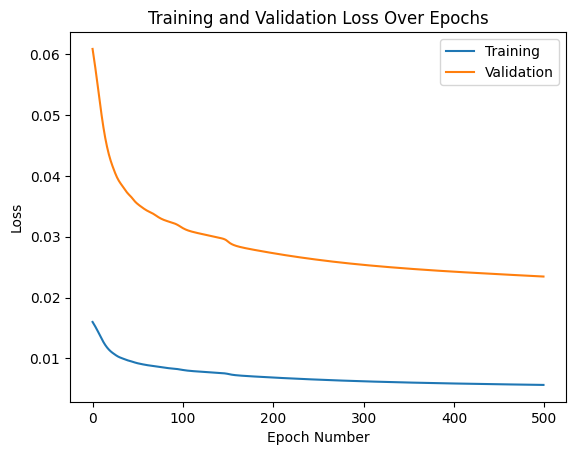

In [78]:
# Plotting
plt.plot(per_epoch_loss_train, label = 'Training')
plt.plot(per_epoch_loss_val, label = 'Validation')


plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# Quantify average reconstruction error & explain chosen hyperparameter values

In [79]:
reconstruction_error = np.mean(per_epoch_loss_val)
reconstruction_error

0.02848846774497668

Explaining chosen hyperparameter values:

I tried several combinations of hyperparameters, adjusting the learning rate, batch size, and epochs (as seen above). Overall, the final ones chosen were learning rate = 1e-3, batch size = 400, and epochs = 500.
